Задача 1

In [ ]:
import numpy as np

In [ ]:
np.random.seed(1)

In [ ]:
# правя матриците
A = np.random.rand(1500, 1500)
B = np.random.rand(1500, 1500)

In [ ]:
# проверка (AB)^T = B^T * A^T
AB = np.dot(A, B)
AB_T = AB.T
BT_AT = np.dot(B.T, A.T)
equality_transpose = np.allclose(AB_T, BT_AT)

In [ ]:
# проверка |AB| = |A| * |B|
det_A = np.linalg.det(A)
det_B = np.linalg.det(B)
det_AB = np.linalg.det(AB)
equality_determinant = np.isclose(det_AB, det_A * det_B)

/usr/local/lib/python3.10/dist-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [ ]:
# проверка |A^(-1)| = 1 / |A|
A_inv = np.linalg.inv(A)
det_A_inv = np.linalg.det(A_inv)
inverse_determinant_relation = np.isclose(det_A_inv, 1 / det_A)

In [ ]:
equality_transpose, equality_determinant, inverse_determinant_relation

(True, True, True)

Задача 2

In [ ]:
# вкарване на матриците

matrices = {
    "a": np.array([[2, -1, -1], [-1, 2, -1], [-1, -1, 2]]),
    "b": np.array([[2, -1, -1], [-1, 2, 1], [-1, 1, 2]]),
    "c": np.array([[1, 2, 3], [2, 5, 4], [3, 4, 9]]),
    "d": np.array([[1, 2, 0, 0], [2, 6, -2, 0], [0, -2, 5, -2], [0, 0, -2, 3]])
}

In [ ]:
# Analyze the spectrum of each matrix
results = {}
for key, matrix in matrices.items():
    eigenvalues = np.linalg.eigvals(matrix)
    if np.all(eigenvalues > 0):
        classification = "Positive definite"
    elif np.all(eigenvalues < 0):
        classification = "Negative definite"
    else:
        classification = "Neither positive nor negative definite"
    results[key] = {
        "eigenvalues": eigenvalues,
        "classification": classification
    }

results

{'a': {'eigenvalues': array([ 3.0000000e+00, -4.4408921e-16,  3.0000000e+00]),
  'classification': 'Neither positive nor negative definite'},
 'b': {'eigenvalues': array([1., 4., 1.]),
  'classification': 'Positive definite'},
 'c': {'eigenvalues': array([12.59238133, -0.12540446,  2.53302313]),
  'classification': 'Neither positive nor negative definite'},
 'd': {'eigenvalues': array([8.20060688, 5.        , 0.147653  , 1.65174012]),
  'classification': 'Positive definite'}}

In [ ]:
for name, matrix in matrices.items():
    eigenvalues = np.linalg.eigvals(matrix)
    if np.all(eigenvalues > 0):
        status = "Positive definite"
    elif np.all(eigenvalues < 0):
        status = "Negative definite"
    else:
        status = "Neither positive nor negative definite"
    print(f"Matrix {name}: {status} (Eigenvalues: {eigenvalues})")


Matrix a: Neither positive nor negative definite (Eigenvalues: [ 3.0000000e+00 -4.4408921e-16  3.0000000e+00])
Matrix b: Positive definite (Eigenvalues: [1. 4. 1.])
Matrix c: Neither positive nor negative definite (Eigenvalues: [12.59238133 -0.12540446  2.53302313])
Matrix d: Positive definite (Eigenvalues: [8.20060688 5.         0.147653   1.65174012])


Задача 3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing(as_frame=True)['frame']

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# 1.Направете основен експлораторен анализ като вземете дескриптивни статистики. Проверете какви са типовете на данните във всяка колона.

df.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
MedHouseVal,float64


In [ ]:
df.shape

(20640, 9)

In [ ]:
# 2. Каква е медианата на променливата AveBedrms, където променливата HouseAge е равна на 30?

filtered_data = df[df['HouseAge'] == 30]

In [ ]:
filtered_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
129,6.0666,30.0,6.446064,1.008746,844.0,2.460641,37.84,-122.20,3.115
140,6.3624,30.0,5.615385,0.730769,126.0,2.423077,37.81,-122.18,4.833
187,1.8854,30.0,3.798479,1.003802,1011.0,3.844106,37.79,-122.23,1.375
208,1.6198,30.0,4.357143,1.035714,425.0,3.035714,37.79,-122.23,1.227
285,2.8750,30.0,4.731152,1.061166,1704.0,2.423898,37.77,-122.17,1.353


In [ ]:
median_ave_bedrms = filtered_data['AveBedrms'].median()

median_ave_bedrms

1.0502678545986455

In [ ]:
# 3. Проверете корелация на Pearson и на Spearman между MedHouseVal и останалите променливи (може да го направите в loop, за по-бързо). Изведете и значимост на корелациите.
correlation_results = []

In [ ]:
target = 'MedHouseVal'

In [ ]:
for column in df.columns:
    if column != target:

        pearson_corr, pearson_p = pearsonr(df[column], df[target])
        spearman_corr, spearman_p = spearmanr(df[column], df[target])

        correlation_results.append({
            "Variable": column,
            "Pearson Correlation": pearson_corr,
            "Pearson P-value": pearson_p,
            "Spearman Correlation": spearman_corr,
            "Spearman P-value": spearman_p
        })

In [ ]:
correlation_results_df = pd.DataFrame(correlation_results)
correlation_results_df.sort_values(by="Pearson Correlation", ascending=False)

,Variable,Pearson Correlation,Pearson P-value,Spearman Correlation,Spearman P-value
0,MedInc,0.688075,0.000000e+00,0.676778,0.000000e+00
2,AveRooms,0.151948,7.569242e-107,0.263367,0.000000e+00
1,HouseAge,0.105623,2.761861e-52,0.074855,4.844329e-27
5,AveOccup,-0.023737,6.483442e-04,-0.256594,1.289394e-307
4,Population,-0.024650,3.976308e-04,0.003839,5.813127e-01
7,Longitude,-0.045967,3.923322e-11,-0.069667,1.241002e-23
3,AveBedrms,-0.046701,1.912589e-11,-0.125187,7.188442e-73
6,Latitude,-0.144160,2.939859e-96,-0.165739,4.994632e-127


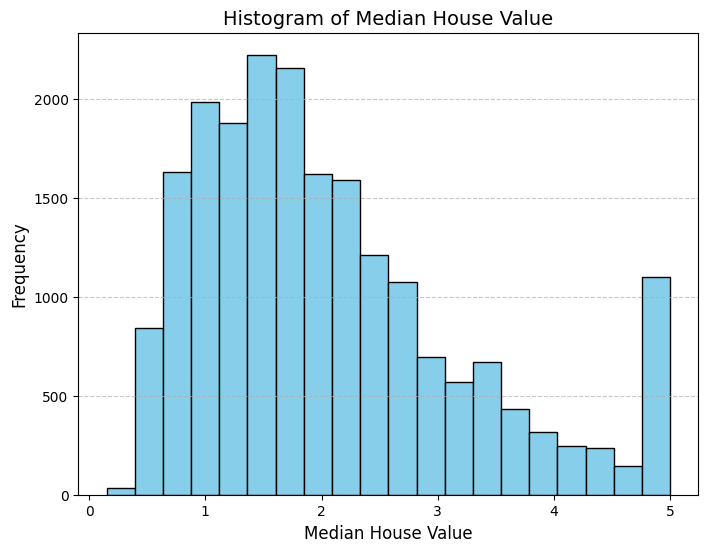

In [ ]:
# 4.Направете хистограма на MedHouseVal. Кога използваме хистограма и кога колонна диаграмa (bar chart)?
plt.figure(figsize=(8, 6))
plt.hist(df['MedHouseVal'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Median House Value', fontsize=14)
plt.xlabel('Median House Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Използваме хистограма за непрекъснати данни, а бар чарт за категорични данни

In [ ]:
# 5.Разделете данните на тренингови и тестови, като не забравяте да зададете random_state по ваш избор, за да могат резултатите ви да бъдат репродуцирани.
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [ ]:
# 6. Направете линеен модел с избрана от вас библиотека.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.5291402345397312, 0.596596837481235)

Задача 4

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import zipfile

zip_filename = 'n02099601-golden_retriever.zip'

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()

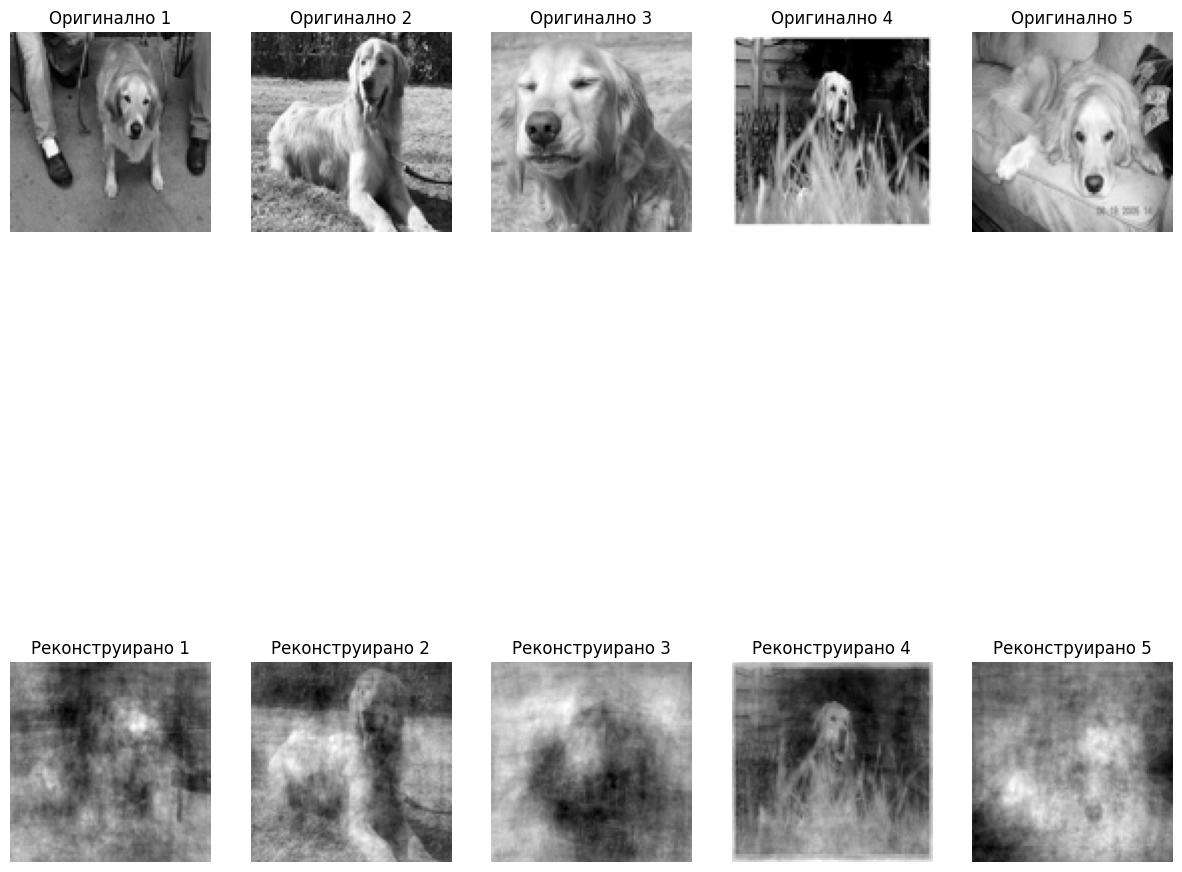

In [ ]:
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image



def load_images_from_folder(folder, show_images=False):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path).convert("L")
        img = img.resize((100, 100))
        if show_images:
            plt.imshow(img, cmap="gray")
            plt.axis("off")
            plt.show()
        images.append(np.array(img).flatten())
    return np.array(images)

folder_path = "/content/n02099601-golden_retriever"
data = load_images_from_folder(folder_path, show_images=False)


scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

pca = PCA(n_components=0.8)
data_pca = pca.fit_transform(data_normalized)

data_reconstructed = pca.inverse_transform(data_pca)

reconstructed_images = data_reconstructed.reshape(-1, 100, 100)

num_images_to_show = 5

plt.figure(figsize=(15, 15))

for i in range(num_images_to_show):

    plt.subplot(2, num_images_to_show, i+1)
    plt.imshow(data[i].reshape(100, 100), cmap="gray")
    plt.axis("off")
    plt.title(f"Оригинално {i+1}")

    plt.subplot(2, num_images_to_show, i+1 + num_images_to_show)
    plt.imshow(reconstructed_images[i], cmap="gray")
    plt.axis("off")
    plt.title(f"Реконструирано {i+1}")

plt.show()